# Alta Dimensionalidade na Clusterização Não Hierárquica

Alta Dimensionalidade no contexto da aplicação em Modelos de Agrupamento.

Autora: Isabelle Chacon

## Introdução Geral

Este projeto tem o intuito de explorar o problema da Alta Dimensionalidade, e quais técnicas de Transformação de Dados podem ser usadas para trabalhá-lo. 

### Fonte dos Dados

Fonte intermediária dos dados: 
* European Soccer Database: https://www.kaggle.com/hugomathien/soccer

Original Data Source:
* http://football-data.mx-api.enetscores.com/ : scores, lineup, team formation and events
* http://www.football-data.co.uk/ : betting odds. Click here (http://www.football-data.co.uk/notes.txt) to understand the column naming system for betting odds:
* http://sofifa.com/ : players and teams attributes from EA Sports FIFA games. FIFA series and all FIFA assets property of EA Sports.

## Introdução Teórica

### Transformação de Escala

Existem transformações de dados de diversos tipos, podendo ser uma **agregação** em termos de uma medida, **categorização de intervalos de classes**, discretização, ou até a **geração de novos atributos**. Além destes, também existem transformações que não afetam a quantidade final de variáveis do dataset, porém continuam sendo de vital importância para uma boa modelagem do sistema, sendo as mais conhecidas as **transformações de escala, normalização e padronização**. Esse grupo de transformações atua na incompatibilidade das unidades de medida (POCO, FGV), evitando que, tanto algoritmos que automatizam certas transformações de dados (como o PCA), quanto algoritmos de Aprendizagem de Máquina, privilegiem os atributos de **maior ordem de grandeza** em detrimento dos de **menor ordem de grandeza**. 
Segundo a documentação do Scikit-learn (Preprocessing data) muitos procedimentos internos usados na **função objetivo** de diversos **algoritmos de aprendizado** (como RBF Kernel ou Support Vector Machines) partem da premissa que todos os dados estão **centrados em torno de zero** e com **variância na mesma ordem de grandeza**, pois caso os dados estejam em magnitudes muito distoantes, as variáveis com uma escala maior podem dominar a função objetivo e fazer com que o estimados deixe de aprender sobre os outros atributos.

Neste projeto, decidiu-se aplicar a técnica de **Transformação de Escala** baseada em **Interquartis** Robust Scaler, pois tanto a técnica de **Normalização** quanto a técnica de **Padronização** presumem que os dados assumem uma **Distribuição Normal** de Probabilidade (por usarem, respectivamente, a medida de tendência central Média e o Desvio-padrão para seus cálculos), e devido a alta dimensionalidade da base é inviável realizar **testes estatísticos** que **verifiquem esta hipótese**. Já a técnica baseada em **Mínimos e Máximos**, por ser calculado em termos do valor mínimo e máximo de cada variável, também possui a desvantagem de ser **sensível a Outliers**. Portanto, o **Robust Scaler** foi escolhido como uma alternativa que diminuiu a necessidade do tratamento de outliers, por se basear no primeiro e terceiro quartis para seu cálculo. 

Além das transformações supracitadas, temos aquelas aplicadas ao tratamento da Alta Dimensionalidade, o alvo deste estudo, que será abordado na próxima sessão. 

### PCA - Análise de Componentes Principais

Uma vez que temos um **sistema complexo** para modelar (as partidas de futebol), por mais que tenhamos inicialmente preservado o máximo de informações possíveis do dataset, não necessariamente o **Algoritmo de Aprendizagem de Máquina** possui a capacidade de modelar este sistema, uma vez que esta capacidade é determinada pelo **limite computacional** de seu **Algoritmo de Iteração**.

Por isso, faz-se necessário a **priorização das variáveis** verdadeiramente **representativas** pro fenômeno. De certa forma, esta tarefa já foi realizada, em algum grau, de forma manual, todas as vezes que foram feitas filtragens no **eixo das colunas** na fase de **Pré-processamento**, e também na seleção de features justificada por sua Estatística Descritiva (a **Feature Selection** feita ao desconsiderar Variáveis sem **Variabilidade** e Variáveis com **Redundância**).

Entretanto, tal seleção manual empregada até então é por si só limitada, pois não contém um **método genérico e automatizado** que aplique uma **definição rigorosa** sobre o que torna uma variável representativa ou não. Desta forma, é neste contexto que surge a técnica de **Análise de Componentes Principais PCA**, pois ela parte da premissa de que uma variável representativa é aquela que possui a **maior variabilidade em relação as outras**. Apartir disto, está técnica não só seleciona estas colunas ditas representativas, como transforma as variáveis não representativas de maneira a **expressar sua informação** de variação **em termos das componentes principais**. 

Em termos da **Geometria Analítica**, cada evento do dataset é interpretado como um **vetor num espaço vetorial**, definido como um segmento de reta orientado (que pode ser interpretado como deslocamento) partindo do ponto inicial centrado na Origem **O** (Ex:. **0 = (0, 0) no R²**), em direção ao ponto final definido pelas informações de cada observação, com suas **coordenadas do vértice** dadas pelo valor que assume em cada atributo (LEDESMA, 2021, p.65-66), e cada **atributo sendo um eixo de dimensão** deste espaço de **coordenadas cartesianas**. 

Para vetores não nulos, é possível realizar a **Projeção Ortogonal** de um evento sobre outro (JAHN), reescrevendo uma mesma observação em termos de outras **bases**, ou seja **decompor um vetor** qualquer na direção de outro (não apenas em termos da **base canônica**), pela **combinação linear** de novas componentes, sendo que a primeira componente deve ser **paralela** e a segunda deve ser **ortogonal** ao vetor original.

Neste processo, quando o valor dos coeficientes (compenentes escalares) resulta num número próximo a zero, significa que os vetores originas tendem a ter um **alinhamento em suas direções**, o que só é possível quando eles tendem a formar um **Conjunto LD** (Linearmente Dependente). 
No contexto da **Análise de Dados**, um vetor alinhado com a direção em que os próprios dados variam, significa um vetor que **expressa a maior parte da informação** que representa o fenômeno.

Segundo Jorge Poco (FGV) o PCA visa portanto, identificar um conjunto de componentes vetoriais que estejam o máximo possível alinhados com a direção de maior variação dos dados, permitindo:
* A representação do sistema por meio de um conjunto menor de variáveis, uma vez que os vetores com coeficientes próximos de zero podem ser desconsiderados por indicarem redunância de informação;
* A visualização de dados em duas direções principais (uma vez que duas dimensões são melhor interpretadas pelo ser humano);
* O uso dos coeficientes escalares, associados aos vetores mais representativos, no lugar das variáveis originais.

Algo interessante de se observar é que, devido a **natureza contínua** da maioria das **grandezas** da natureza, ao efeito do **erro aleatório** nos **sistemas de medida** (Efeito do Observador sobre quaisquer experimentos), e outros fatores externos envolvido em toda **pipeline da geração de dados**, é extremamente improvável que um conjunto de dados reais seja Linearmente Dependente de forma precisa. Isso possibilita que todas as **operações algébricas**, atribuídas para **a definição de independência linear**, possam ser aplicadas diretamente em dados reais, sem a necessidade de trabalhar, por exemplo, com o conceito Limite para se estudar o comportamento dos dados.

### Referências Bibliográficas

JAHN, A. P. **Projeção Ortogonal de Vetores**. Instituto de Matemática e Estatística(IME), Universidade de São Paulo, São Paulo, SP. Disponível em: < https://edisciplinas.usp.br/pluginfile.php/5447649/mod_resource/content/1/MAT105_Projecao_Vetor.pdf >. Acesso em: 15 de fev. de 2022.

LEDESMA, D. S. **Apostila de Geometria Analítica:** Notas de Aula com Exercícios Resolvidos. Instituto de Matemática, Estatística e Computação Científica (IME), Universidade Estadual de Campinas, Campinas, SP, 28 de nov. de 2021. Disponível em: < http://www.ime.unicamp.br/~dledesma/disciplinasministradas/apostilas/Apostila-GA.pdf >. Acesso em: 15 de fev. de 2022.

POCO, J. **Análise de Componentes Principais**.  Apostila recebida no curso autoinstrucional Introdução à Ciência de Dados. Escola de Matemática Aplicada da Fundação Getulio Vargas, Rio de Janeiro, RJ. Disponível em: < https://nc-www5.fgv.br/cursosgratuitos/cg/OCWICDEAD/base_rede/pag/assets/Videoaula_11_M4_Analise_de_coponentes_principais_revisto.pdf >. Acesso em: 15 de fev. de 2022.

POCO, J. **Métodos matemáticos e computacionais**.  Apostila recebida no curso autoinstrucional Introdução à Ciência de Dados. Escola de Matemática Aplicada da Fundação Getulio Vargas, Rio de Janeiro, RJ. Disponível em: < https://nc-www5.fgv.br/cursosgratuitos/cg/OCWICDEAD/base_rede/pag/assets/Videoaula_10_M4_Tratamento_e_transformacao_de_dados_revisto_revisto.pdf >. Acesso em: 15 de fev. de 2022. 


   **Outras Referências:**
   
LEDESMA, D. S. **Apostila de Geometria Analítica:** Notas de Aula com Exercícios Resolvidos. Creative Writing. Instituto de Matemática, Estatística e Computação Científica (IME), Universidade Estadual de Campinas, Campinas, SP, 28 de nov. de 2021.

SCIKIT-learn: **Machine Learning in Python**: Decomposition PCA, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011. Disponível em: < https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html > Acesso em: 10/02/2022.

SCIKIT-learn: **Machine Learning in Python**: Preprocessing data, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011. Disponível em: < https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler > Acesso em: 13/02/2022.

## Importação das Bibliotecas

In [1]:
!pip install pyinform

In [2]:
#Bibliotecas utilizadas na manipulação geral dos dados
import pandas as pd 
import numpy as np
import math

#Biblioteca para informar o progresso da execução das células
from tqdm.notebook import tqdm as tqdm

#Biblioteca para manipular dados no formato de data
from datetime import date

#Bibliotecas para a visualização gráfica dos dados
from matplotlib import pyplot as plt
from matplotlib import gridspec
import seaborn as sb

#Bibliotecas usadas para a manipulação de Dados Semiestruturados
import pprint as pp
from xml.dom.minidom import parseString, Document, Element, Text, Node, DOMImplementation

#Bibliotecas usadas para Modelagem e Avaliação do Método de agrupamento kmeans
from sklearn.cluster import KMeans
from sklearn import metrics as me 

#Bibliotecas usadas para Transformação dos Dados
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA

#Bibliotecas usadas para Cálculo da Entropia
from pyinform.shannon import entropy

## Pré-Processamento dos Dados

O processamento realizado abaixo tem como o objetivo a criação de um Dataset único que preserve o máximo de informações possíveis sobre o fenômeno analisado, com ênfase no **tratamento de dados faltantes**. Esta abordagem, **propositalmente**, resultará na **Alta Dimensionalidade**, um dos desafios da aplicação de Modelos de  Machine Learning, uma vez que gerará **aumento da complexidade do sistema**, podendo causar **super-ajuste** (Overfitting) do modelo aos dados de treinamento, e também **demandar** uma quantidade considerável de **recursos computacionais**(referenciar).

Assim, como o intuito geral do projeto é a exploração da **degradação da performance** do modelo a medida que são feitas as **manipulações das variáveis**, forçar ainda mais a Alta Dimensionalidade no Dataset desde o início, irá fornecer um **contraste** maior quando as técnicas de **Transformação de Dados e Feature Engineering** forem aplicadas.

### Carregamento e Manipulação

#### Dataset Match

Interpretação do Dicionário de Dados

In [3]:
print("""
OBS: Esta interpretação dos dados teve como limitante meu baixo conhecimento sobre o contexto de "negócio" 
dos dados analisados, portanto não pode ser considerada assertiva.

    INTERPRETAÇÃO PESSOAL:
- HTHG = Coluna home_team_goal = Gols do time da casa 
- HTAG = Coluna away_team_goal = Gols do time fora da casa 
- Colunas com prefixo "home_player_X" e "away_player_X" variando de 1 a 11, correspondem a...:
Coordenadas da posição do jogador no eixo x.
- Colunas com prefixo "home_player_Y" e "away_player_Y" variando de 1 a 11, correspondem a...:
Coordenadas da posição do jogador no eixo Y.
- Colunas com prefixo "home_player_" e "away_player_" variando de 1 a 11, correspondem a...:
Código identificador do jogador em quadra (player_api_id).

    DICIONÁRIO OFICIAL DOS DADOS DE PROBABILIDADE DAS APOSTAS 1x2:
B365H = probabilidades de vitória em casa Bet365 
B365H = Bet365 home win odds
B365D = Bet365 draw odds
B365A = Bet365 away win odds
BSH = Blue Square home win odds
BSD = Blue Square draw odds
BSA = Blue Square away win odds
BWH = Bet&Win home win odds
BWD = Bet&Win draw odds
BWA = Bet&Win away win odds
GBH = Gamebookers home win odds
GBD = Gamebookers draw odds
GBA = Gamebookers away win odds
IWH = Interwetten home win odds
IWD = Interwetten draw odds
IWA = Interwetten away win odds
LBH = Ladbrokes home win odds
LBD = Ladbrokes draw odds
LBA = Ladbrokes away win odds
PSH and PH = Pinnacle home win odds
PSD and PD = Pinnacle draw odds
PSA and PA = Pinnacle away win odds
SOH = Sporting Odds home win odds
SOD = Sporting Odds draw odds
SOA = Sporting Odds away win odds
SBH = Sportingbet home win odds
SBD = Sportingbet draw odds
SBA = Sportingbet away win odds
SJH = Stan James home win odds
SJD = Stan James draw odds
SJA = Stan James away win odds
SYH = Stanleybet home win odds
SYD = Stanleybet draw odds
SYA = Stanleybet away win odds
VCH = VC Bet home win odds
VCD = VC Bet draw odds
VCA = VC Bet away win odds
WHH = William Hill home win odds
WHD = William Hill draw odds
WHA = William Hill away win odds
""")


OBS: Esta interpretação dos dados teve como limitante meu baixo conhecimento sobre o contexto de "negócio" 
dos dados analisados, portanto não pode ser considerada assertiva.

    INTERPRETAÇÃO PESSOAL:
- HTHG = Coluna home_team_goal = Gols do time da casa 
- HTAG = Coluna away_team_goal = Gols do time fora da casa 
- Colunas com prefixo "home_player_X" e "away_player_X" variando de 1 a 11, correspondem a...:
Coordenadas da posição do jogador no eixo x.
- Colunas com prefixo "home_player_Y" e "away_player_Y" variando de 1 a 11, correspondem a...:
Coordenadas da posição do jogador no eixo Y.
- Colunas com prefixo "home_player_" e "away_player_" variando de 1 a 11, correspondem a...:
Código identificador do jogador em quadra (player_api_id).

    DICIONÁRIO OFICIAL DOS DADOS DE PROBABILIDADE DAS APOSTAS 1x2:
B365H = probabilidades de vitória em casa Bet365 
B365H = Bet365 home win odds
B365D = Bet365 draw odds
B365A = Bet365 away win odds
BSH = Blue Square home win odds
BSD = Blue Squar

In [4]:
df_match = pd.read_csv("match.csv") #, nrows=5000)

In [5]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [6]:
df_match.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 115 columns):
 #    Column            Non-Null Count  Dtype  
---   ------            --------------  -----  
 0    id                25979 non-null  int64  
 1    country_id        25979 non-null  int64  
 2    league_id         25979 non-null  int64  
 3    season            25979 non-null  object 
 4    stage             25979 non-null  int64  
 5    date              25979 non-null  object 
 6    match_api_id      25979 non-null  int64  
 7    home_team_api_id  25979 non-null  int64  
 8    away_team_api_id  25979 non-null  int64  
 9    home_team_goal    25979 non-null  int64  
 10   away_team_goal    25979 non-null  int64  
 11   home_player_X1    24158 non-null  float64
 12   home_player_X2    24158 non-null  float64
 13   home_player_X3    24147 non-null  float64
 14   home_player_X4    24147 non-null  float64
 15   home_player_X5    24147 non-null  float64
 16   home_player_X6    24

In [7]:
print( ( df_match.iloc[:,55:77].dropna().shape[0] /df_match.shape[0])*100, '%')

82.274144501328 %


As colunas com os prefixos `home_player_` e `away_player_` contêm a referência à coluna `player_api_id` da tabela `df_player`, que correspondem ao id de cada jogador em sua posição da partida. Para mesclar os dados de ambas as tabelas é preciso que todas estas colunas (índice 55 a 77), em todas as linhas (originalmente 25979 linhas), contenham este campo identificador, o que é plausível pois cerca de 82,27% da base tem tais campos preenchidos.

Assim sendo, a primeira seleção de linhas de todo o dataset terá este grupo de colunas como determinante. Abaixo a filtragem:

In [8]:
df_bruto0 = df_match.loc[df_match.iloc[:,55:77].dropna().index, :]
df_bruto0.info(verbose=True, show_counts=True)

#df_bruto0.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21374 entries, 145 to 25978
Data columns (total 115 columns):
 #    Column            Non-Null Count  Dtype  
---   ------            --------------  -----  
 0    id                21374 non-null  int64  
 1    country_id        21374 non-null  int64  
 2    league_id         21374 non-null  int64  
 3    season            21374 non-null  object 
 4    stage             21374 non-null  int64  
 5    date              21374 non-null  object 
 6    match_api_id      21374 non-null  int64  
 7    home_team_api_id  21374 non-null  int64  
 8    away_team_api_id  21374 non-null  int64  
 9    home_team_goal    21374 non-null  int64  
 10   away_team_goal    21374 non-null  int64  
 11   home_player_X1    21367 non-null  float64
 12   home_player_X2    21367 non-null  float64
 13   home_player_X3    21365 non-null  float64
 14   home_player_X4    21365 non-null  float64
 15   home_player_X5    21365 non-null  float64
 16   home_player_X6    

In [9]:
df_bruto0.iloc[:, [97, 98, 99, 103, 104, 105, 109, 110, 111, 112, 113, 114]].head() 

,PSH,PSD,PSA,SJH,SJD,SJA,GBH,GBD,GBA,BSH,BSD,BSA
145,NaN,NaN,NaN,3.05,3.20,2.30,2.90,3.25,2.30,2.80,3.2,2.25
153,NaN,NaN,NaN,3.05,3.25,2.25,2.90,3.20,2.30,2.62,3.2,2.38
155,NaN,NaN,NaN,1.36,4.50,8.50,1.35,4.33,8.50,1.36,4.2,7.00
162,NaN,NaN,NaN,4.75,3.50,1.73,4.50,3.40,1.75,4.20,3.3,1.75
168,NaN,NaN,NaN,1.67,3.50,5.00,1.65,3.50,5.00,1.70,3.4,4.33


In [10]:
df_bruto0.iloc[:, [97, 98, 99, 103, 104, 105, 109, 110, 111, 112, 113, 114]].count()

PSH    10446
PSD    10446
PSA    10446
SJH    14627
SJD    14627
SJA    14627
GBH    11854
GBD    11854
GBA    11854
BSH    11856
BSD    11856
BSA    11856
dtype: int64

In [11]:
media = np.mean(df_bruto0.iloc[:, [97, 98, 99, 103, 104, 105, 109, 110, 111, 112, 113, 114]].count())
media

12195.75

In [12]:
print(media/df_bruto0.shape[0]*100, "%")

57.05880976887807 %


As colunas de índice 97 a 99, 103 a 105 e 109 a 114 contém, em média, apenas 57.06% de seus valores preenchidos, e por isso também  estão sendo eliminadas da análise. 

In [13]:
df_bruto1 = df_bruto0.drop(columns=df_bruto0.columns[[97, 98, 99, 103, 104, 105, 109, 110, 111, 112, 113, 114]])
#df_bruto1.info(verbose=True, show_counts=True)
df_bruto1.shape

(21374, 103)

#### Dataset Player

In [14]:
df_player0 = pd.read_csv("player.csv")

In [15]:
df_player0.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


Convertendo a coluna birthday de uma Escala Intervalar para uma Escala Racional, normalizando os dados para que assumam valores absolutos e possam ser melhor interpretados pelo modelo.

In [16]:
df_player0["date_birthday"] = df_player0.birthday.str.slice(0, 10)
df_player0["age"] = df_player0["date_birthday"].apply(lambda x : (date.today() -date( int(x[:4]), int(x[5:7]), int(x[8:10]) )).days/365.25)
df_player0.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date_birthday,age
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992-02-29,29.968515
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,1989-12-15,32.175222
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,1991-05-13,30.767967
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,1982-05-08,39.780972
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,1979-11-08,42.277892


In [17]:
df_player0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
 7   date_birthday       11060 non-null  object 
 8   age                 11060 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 777.8+ KB


#### Dataset Player_attributes

In [18]:
df_player_attributes = pd.read_csv("player_attributes.csv")

In [19]:
df_player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [20]:
df_player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [21]:
df_player_attributes.nunique()

id                     183978
player_fifa_api_id      11062
player_api_id           11060
date                      197
overall_rating             61
potential                  56
preferred_foot              2
attacking_work_rate         8
defensive_work_rate        19
crossing                   95
finishing                  97
heading_accuracy           96
short_passing              95
volleys                    93
dribbling                  97
curve                      92
free_kick_accuracy         97
long_passing               95
ball_control               93
acceleration               86
sprint_speed               85
agility                    81
reactions                  78
balance                    81
shot_power                 96
jumping                    79
stamina                    84
strength                   82
long_shots                 96
aggression                 91
interceptions              96
positioning                95
vision                     97
penalties 

   Ao analisar os valores únicos do dataset df_player_attributes, percebeu-se que os dados dos atributos dos jogadores foram registrados numa evolução ao longo do tempo.
   Observando o gráfico abaixo (Figura 1), é possível visualizar que a distribuição da quantidade de registros por ano não segue um padrão definido, sendo plausível deduzir que a coleta dos dados não seguiu uma única metodologia durante o período.

   Portanto, para simplificar a análise, decidiu-se desconsiderar a evolução histórica de tais características, usando em seu lugar apenas média de cada atributo.

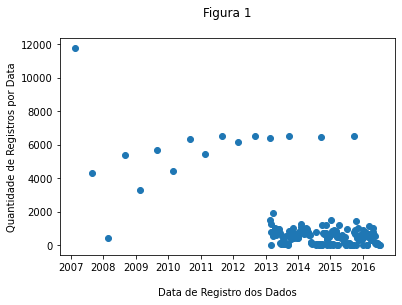

In [22]:
df_player_attributes["date"] = pd.to_datetime(df_player_attributes.date.astype("str").str.slice(0, 10)) 
plt.scatter(df_player_attributes["date"].value_counts().index, df_player_attributes["date"].value_counts().values)
plt.title("Figura 1\n") 
plt.xlabel("\nData de Registro dos Dados")
plt.ylabel("Quantidade de Registros por Data")
plt.show()

Desconsiderando da tabela df_player_attributes os campos de identificação (exceto o que será usado para mesclar os dados), a data e outras variáveis categóricas.

In [23]:
df_player_attributes = df_player_attributes.drop(columns=["id", "player_fifa_api_id", "date", "preferred_foot", "attacking_work_rate", "defensive_work_rate" ])

Agrupando os atributos dos jogadores pela média de cada player.

In [24]:
df_player_attributes = df_player_attributes.groupby(by="player_api_id", as_index=False).mean()
df_player_attributes.head()

,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,2625,60.142857,61.142857,50.142857,47.285714,46.285714,56.500000,38.000000,54.142857,50.000000,...,55.285714,61.928571,62.928571,63.857143,56.571429,12.428571,12.857143,19.071429,10.357143,10.428571
1,2752,69.380952,70.380952,36.428571,37.428571,75.333333,54.809524,20.428571,44.857143,30.428571,...,52.428571,35.428571,71.095238,70.666667,65.571429,11.095238,6.095238,7.095238,9.095238,15.095238
2,2768,69.285714,70.571429,42.238095,42.761905,66.666667,64.714286,28.761905,40.238095,51.761905,...,57.761905,31.904762,71.666667,70.619048,79.714286,10.761905,15.904762,22.714286,15.142857,12.095238
3,2770,71.133333,73.533333,61.866667,67.666667,67.800000,72.533333,67.133333,75.066667,79.800000,...,71.600000,63.933333,30.200000,37.533333,25.000000,8.666667,15.666667,27.200000,16.333333,17.000000
4,2790,70.200000,75.800000,70.000000,37.400000,55.200000,68.000000,43.000000,60.800000,67.000000,...,60.000000,55.400000,74.600000,74.600000,69.000000,8.000000,17.000000,59.000000,16.600000,17.400000


#### Dataset Team_attributes

In [25]:
df_team_attributes = pd.read_csv("team_attributes.csv")

In [26]:
df_team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [27]:
df_team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [28]:
df_team_attributes.nunique()

id                                1458
team_fifa_api_id                   285
team_api_id                        288
date                                 6
buildUpPlaySpeed                    57
buildUpPlaySpeedClass                3
buildUpPlayDribbling                49
buildUpPlayDribblingClass            3
buildUpPlayPassing                  58
buildUpPlayPassingClass              3
buildUpPlayPositioningClass          2
chanceCreationPassing               50
chanceCreationPassingClass           3
chanceCreationCrossing              56
chanceCreationCrossingClass          3
chanceCreationShooting              57
chanceCreationShootingClass          3
chanceCreationPositioningClass       2
defencePressure                     48
defencePressureClass                 3
defenceAggression                   47
defenceAggressionClass               3
defenceTeamWidth                    43
defenceTeamWidthClass                3
defenceDefenderLineClass             2
dtype: int64

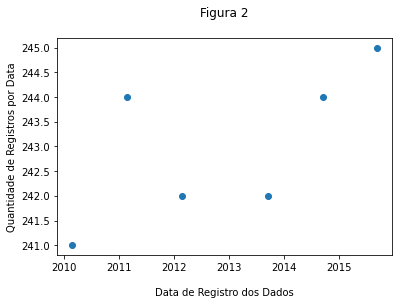

In [29]:
df_team_attributes["date"] = pd.to_datetime(df_team_attributes.date.astype("str").str.slice(0, 10)) 
plt.scatter(df_team_attributes["date"].value_counts().index, df_team_attributes["date"].value_counts().values)
plt.title("Figura 2\n") 
plt.xlabel("\nData de Registro dos Dados")
plt.ylabel("Quantidade de Registros por Data")
plt.show()

Os dados do dataset df_team_attributes, assim como no dataset df_player_attributes, foram registrados mais de uma vez num intervalo de tempo (como pode ser visto na Figura 2), portanto será tratado da mesma forma, usando em seu lugar apenas média de cada atributo da tabela.

In [30]:
print(len(df_team_attributes.buildUpPlayDribbling.dropna())/df_team_attributes.shape[0]*100 , "%")

33.53909465020576 %


Desconsiderando a coluna "buildUpPlayDribbling" por conter apenas 33.54% de seus dados preenchidos, mantendo apenas as variáveis quantitativas da tabela df_team_attributes e o campo chave team_api_id para mesclagem dos dado.

In [31]:
df_team_attributes = df_team_attributes.select_dtypes(include=['number']).drop(columns=["id", "team_fifa_api_id", "buildUpPlayDribbling"])
df_team_attributes.head()

,team_api_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,9930,60,50,60,65,55,50,55,45
1,9930,52,56,54,63,64,47,44,54
2,9930,47,54,54,63,64,47,44,54
3,8485,70,70,70,70,70,60,70,70
4,8485,47,52,53,48,52,47,47,52


In [32]:
df_team_attributes = df_team_attributes.groupby(by="team_api_id", as_index=False).mean() 
df_team_attributes.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   team_api_id             288 non-null    int64  
 1   buildUpPlaySpeed        288 non-null    float64
 2   buildUpPlayPassing      288 non-null    float64
 3   chanceCreationPassing   288 non-null    float64
 4   chanceCreationCrossing  288 non-null    float64
 5   chanceCreationShooting  288 non-null    float64
 6   defencePressure         288 non-null    float64
 7   defenceAggression       288 non-null    float64
 8   defenceTeamWidth        288 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 20.4 KB


### Join datasets

Mesclando os dados da tabela df_player com seus atributos de jogador.

In [33]:
df_player1= pd.merge(df_player0, df_player_attributes, how="inner", on="player_api_id")
df_player1.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date_birthday,age,overall_rating,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992-02-29,29.968515,63.600000,...,53.600000,47.600000,63.800000,66.000000,67.800000,5.600000,10.600000,9.600000,7.600000,7.600000
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,1989-12-15,32.175222,66.969697,...,57.454545,53.121212,69.393939,68.787879,71.515152,12.181818,8.666667,14.242424,10.363636,12.909091
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,1991-05-13,30.767967,67.000000,...,69.384615,60.538462,22.038462,21.115385,21.346154,14.038462,11.807692,17.730769,10.115385,13.500000
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,1982-05-08,39.780972,69.086957,...,53.782609,41.739130,70.608696,70.652174,68.043478,14.173913,11.173913,22.869565,11.173913,10.173913
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,1979-11-08,42.277892,73.240000,...,46.480000,52.960000,77.600000,76.040000,74.600000,8.280000,8.320000,24.920000,12.840000,11.920000


Mesclando os dados da tabela match com a tabela player, desconsiderando da segunda tabela os campos de identificação e os atributos reduntantes (como data de nascimento e idade).

In [34]:
#A coluna player_api_id no dataset do df_player será a chave identificadora para realizar o join com 
#a tabela df_match, que tem correspondência pelas colunas home_player_N e away_player_N, que numeram o 
#jogador participante da partida

colunas_de_interesse = list(df_player_attributes.drop(columns="player_api_id").columns)

df_bruto2 = df_bruto1.copy()
for i in range(1, len( df_bruto2.iloc[:,55:77].columns) ):
    df_bruto2 = pd.merge(df_bruto2, df_player1.add_suffix(str(i)).add_prefix("home_player_"), how="left", 
                         left_on="home_player_"+str(i), right_on="home_player_"+"player_api_id"+str(i)).\
                         loc[:,list(df_bruto2.columns)+\
                               list(df_player1.loc[:, colunas_de_interesse].\
                                    add_suffix(str(i)).add_prefix("home_player_").columns)]                                             
    
    if i==11:
        break
    
#df_bruto2.info(verbose=True, show_counts=True)
df_bruto2.shape

(21374, 488)

In [35]:
for i in range(1, len( df_bruto2.iloc[:,55:77].columns) ):
    df_bruto2 = pd.merge(df_bruto2, df_player1.add_suffix(str(i)).add_prefix("away_player_"), how="left", 
                         left_on="away_player_"+str(i), right_on="away_player_"+"player_api_id"+str(i)).\
                         loc[:,list(df_bruto2.columns)+\
                               list(df_player1.loc[:, colunas_de_interesse].\
                                    add_suffix(str(i)).add_prefix("away_player_").columns)]                                             
    
    if i==11:
        break
    
df_bruto2.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21374 entries, 0 to 21373
Data columns (total 873 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    id                                21374 non-null  int64  
 1    country_id                        21374 non-null  int64  
 2    league_id                         21374 non-null  int64  
 3    season                            21374 non-null  object 
 4    stage                             21374 non-null  int64  
 5    date                              21374 non-null  object 
 6    match_api_id                      21374 non-null  int64  
 7    home_team_api_id                  21374 non-null  int64  
 8    away_team_api_id                  21374 non-null  int64  
 9    home_team_goal                    21374 non-null  int64  
 10   away_team_goal                    21374 non-null  int64  
 11   home_player_X1                    21367 non-null  fl

Mesclando os dados do merge resultante com os atributos do time da casa (prefixo home) e do time adversário (prefixo away), oriundos do dataset Team_attributes

In [36]:
len(df_bruto2.home_team_api_id.unique())

288

In [37]:
len(df_bruto2.away_team_api_id.unique()) 

288

In [38]:
df_bruto3 = pd.merge(df_bruto2, df_team_attributes.add_prefix("home_team_"), how="left", 
                     left_on="home_team_api_id", right_on= "home_team_"+"team_api_id")
#df_bruto3.info(verbose=True, show_counts=True) 
df_bruto3.shape

(21374, 882)

In [39]:
#Foi adicionado o sufixo _ para que em caso de múltiplas execuções da célula as colunas não sejam duplicadas
df_bruto3_ = pd.merge(df_bruto3, df_team_attributes.add_prefix("away_team_"), how="left", 
                     left_on="away_team_api_id", right_on= "away_team_"+"team_api_id")
df_bruto3_.info(verbose=True, show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21374 entries, 0 to 21373
Data columns (total 891 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    id                                21374 non-null  int64  
 1    country_id                        21374 non-null  int64  
 2    league_id                         21374 non-null  int64  
 3    season                            21374 non-null  object 
 4    stage                             21374 non-null  int64  
 5    date                              21374 non-null  object 
 6    match_api_id                      21374 non-null  int64  
 7    home_team_api_id                  21374 non-null  int64  
 8    away_team_api_id                  21374 non-null  int64  
 9    home_team_goal                    21374 non-null  int64  
 10   away_team_goal                    21374 non-null  int64  
 11   home_player_X1                    21367 non-null  fl

### Parser Estrutura de Dados XML

As colunas nomeadas por goal, shoton, shotoff, foulcommit, card, cross, corner,  possession (com índice de número 77 a 84 no Dataset original), contêm dados no **formato XML**, um tipo de **Dado Semiestruturado**. Abaixo é feito o **parser** de uma destas colunas para exploração da informação que contém, com o intuito de reaproveitar seus dados para expandir a base.

#### Exploração

Estrutura XML do Atributo "goal"

In [40]:
#A linha de índice 1 está sendo usada como base, pois a linha 0 contém mais de um elemento value.
unid1_xml = parseString(df_bruto3.loc[:,"goal"].dropna().iloc[1]).toprettyxml()
print(unid1_xml) 

<?xml version="1.0" ?>
<goal>
	<value>
		<comment>n</comment>
		<stats>
			<goals>1</goals>
			<shoton>1</shoton>
		</stats>
		<event_incident_typefk>393</event_incident_typefk>
		<elapsed>4</elapsed>
		<player2>39297</player2>
		<subtype>shot</subtype>
		<player1>26181</player1>
		<sortorder>2</sortorder>
		<team>9825</team>
		<id>375546</id>
		<n>231</n>
		<type>goal</type>
		<goal_type>n</goal_type>
	</value>
</goal>



Valores preenchidos do atributo

In [41]:
df_bruto3.loc[:,"goal"].dropna().shape

(13325,)

Transformação da Estrutura XML para um Dataframe

In [ ]:
goal= 77
series_xml = df_bruto3.iloc[:,goal].dropna().iloc[:] 
df_parse_goal = pd.DataFrame()  #index=series_xml.index)

for i in range(len(series_xml)):
    xml = parseString(df_bruto3.loc[:,"goal"].dropna().iloc[i])
    root = xml.documentElement
    value = root.getElementsByTagName("value")
    index= xml.createElement("index")
    textIndex = xml.createTextNode(str(series_xml.index[i]))
    
    for v in value:  
        #Adicionando o índice de refêrencia a linha do XML no dataset original, como um atributo 
        #dentro de sua própria estrutura, para posteriormente ser possível recuperar o vínculo dos 
        #dados do arquivo com o dataset de origem.
        comment = v.firstChild
        v.insertBefore(index, comment)
        index.appendChild(textIndex)

        #Tentativa 1
        #print(v.toprettyxml())
        #df_parse = pd.read_xml(v.toprettyxml())

        #Tentativa 2
        #doc = Document()
        #doc.appendChild(v)
    #df_parse = pd.read_xml(doc.toprettyxml())
    #df_parse.head(None)

        #Tentativa 3
        #doc_str = doc_str + v.toprettyxml()
    #df_parse = pd.read_xml(doc_str)
    #df_parse.head(None)            

        list_elementValue = []
        list_elementName = []
            
        for child in v.childNodes:
            for c_child in child.childNodes:
                if c_child.childNodes:
                    if c_child.nodeName not in list_elementName:
                        list_elementName.append(c_child.nodeName)
                        list_elementValue.append(c_child.childNodes.item(0).data)

                else:
                    if child.nodeName not in list_elementName:
                        list_elementName.append(child.nodeName)
                        list_elementValue.append(child.childNodes.item(0).data)
        lin = 1  #len(list_elementValue)
        dim = len(list_elementName)
        df_parse = pd.DataFrame( np.reshape(list_elementValue,(lin, dim)), columns=list_elementName )   
        df_parse_goal = df_parse_goal.append(df_parse, ignore_index=True )

df_parse_goal.head(None) 
#df_parse.head(None) 

In [ ]:
df_parse_goal.info()

In [ ]:
pd.DataFrame(df_parse_goal.nunique()).head(None)

In [ ]:
print( ( df_bruto3.loc[:,"goal"].dropna().shape[0] /df_bruto3.shape[0])*100, '%')

#### Conclusão

O intuito dessa exploração sobre os dados em XML, foi verificar a possibilidade de recuperar os dados que contém para vincular ao dataset original. 
Imaginava-se que isso talvez fosse possível partindo da premissa que, o retorno destes dados neste formato, fosse devido a uma falha no Spider utilizado para coleta, uma mudança na estrutura do Site raspado ou API interceptada, que consequentemente tivesse causado alguma incoerência na iteração pelos elementos da estrutura, fazendo com que mais de um registro fosse agrupado numa mesma linha do dataset. 

Assim, esperava-se que ao analisar o retorno do parser, houvesse uma forma de "engenharia reversa" do processo de raspagem, tornando possível expandir a base para completar as linhas NaN. Essa linha de raciocínio de fato foi adequada, pois ao realizar a transformação das linhas de uma única coluna em XML para uma estrutura Dataframe, a base de fato ampliou, retornando mais de uma linha para um mesmo índice do dataset original. 

Entretanto, o parser de forma isolada não retornou informações suficientes, não foi possível encontrar o dicionário de dados dessas colunas em específico (para complementar sua interpretação), e tampouco acessar a fonte de dados original, uma vez que um dos sites está fora do ar, e plataformas que arquivam páginas da web (como https://archive.org/web/) parecem não armazenar todo o HTML da URL de origem. 

Portanto, após esgotar todas as possibilidades, e devido a pouco quantidade de dados das colunas de índice 77 a 84 (só 62.34% de suas respectivas linhas estão preenchidas), decidiu-se eliminar estes atributos da análise. 

In [ ]:
df_bruto4 = df_bruto3_.drop(columns=df_bruto3.columns[list(range(77,85))]).set_index("id")
#df_bruto4.info(verbose=True, show_counts=True)
#df_bruto4.head()
df_bruto4.shape

### Base final Pós-processada

In [ ]:
df_bruto4.loc[:, list(df_bruto4.columns[list(range(76, 94))])  ].count()

In [ ]:
media2 = np.mean(df_bruto4.loc[:, list(df_bruto4.columns[list(range(76, 94))])  ].count())
media2

In [ ]:
print(media2/df_bruto4.shape[0]*100, "%")

As primeiras colunas estão sendo eliminadas, além da informação de data que também não será usada, por serem chaves de identificação que não possuem significado semântico, ou por serem dados de identificação que dizem respeito a variáveis categóricas já transformadas em numéricas (como a identificação de um país), e como esta análise tem por objetivo a aplicação do PCA como principal ferramenta de Tranformação dos Dados, preferiu-se manter apenas as variáveis essencialmente quantitativas.

Por fim, também optou-se por fazer uma última redução da base no eixo das linhas, pois as colunas de probabilidade restantes (de índice 76 a 93 no dataset resultante da última filtragem de colunas, df_bruto4), contêm em média aproximadamente 19668 linhas preenchidas, o que corresponde a 92% de linhas do último pré-processamento (df_bruto4).

In [ ]:
df_posprocessamento = df_bruto4.drop(columns=df_bruto4.columns[list(range(8))]).dropna(axis=0)
df_posprocessamento.head()

Confirmando se não restou nenhuma coluna com campo de identificação

In [ ]:
pd.Series(df_posprocessamento.columns).iloc[ list(pd.Series(df_posprocessamento.columns).apply(lambda x: x.find("_id")!=-1 ).values)] 

In [ ]:
df_posprocessamento = df_posprocessamento.drop(columns=list(pd.Series(df_posprocessamento.columns).iloc[ list(pd.Series(df_posprocessamento.columns).apply(lambda x: x.find("_id")!=-1 ).values)].values) )

In [ ]:
df_posprocessamento.shape[1]

In [ ]:
#TESTES (APAGAR DO ARQUIVO DE ENTREGA)

df_bruto4.count().min()
np.min(list(df_bruto4.index)) 
df_bruto4.index.dropna()


#df_modelS_transform = df_bruto4.drop(columns=df_bruto4.columns[list(range(8))]).dropna(axis=0)

#TENTANTO ELIMINAR AS LINHAS COM NaN sem reduzir a base para 

df_bruto4.notna().apply(lambda x: df_bruto4.drop(index=x) if x==False , axis=0)   #.count().min()

df_bruto4.iloc[ df_bruto4 ,:]

list_rows = []

for index, row in df_bruto4.notna().iterrows():
    lin = [row]

#df_modelS_transform.info(verbose=True, show_counts=True) 


### Conclução Pré-processamento

Métricas e análise do resultado final do pré-processamento

In [ ]:
print(media2/df_match.shape[0]*100, "%")

In [ ]:
qtLinhas_final = df_bruto4.loc[:, list(df_bruto4.columns[list(range(76, 94))])  ].count().min()
qtLinhas_final

Quantidade de Dados úteis **ANTES** do Pré-processamento

In [ ]:
df_match.count().sum()

Quantidade de Dados úteis **DEPOIS** do Pré-processamento

In [ ]:
qtLinhas_final*df_posprocessamento.shape[1]

  **CONCLUSÃO**

O resultado final do Pré-processamento resultou na **preservação de 75.7% eventos observados** do dataset original (Match), além da expansão dos atributos que representam tais eventos, através da manipulação das tabelas auxiliares, resultando em **17.121.720 dados úteis** (com todos os eventos e features preenchidos), contra **2.580.190 dados brutos** que haviam no início (quantidade bruta de valores não nulos, porém sem homogeneidade entre linhas e colunas).

Nesta linha de raciocínio, o agrupamento irá modelar o fenômeno "movimentos da partida", as probabilidades atribuídas, a média dos atributos individuais de cada jogador presente na partida, juntamente com média dos scores atribuídos para cada time.  

### Execução do código funcional

Código final resultante de todo o **Pré-processamento** encapsulado nesta única célula, fornecendo todos os dados realmente necessários a execução do restante do projeto.

In [ ]:
# -*- coding: utf-8 -*-

    #Dataset Match
df_match = pd.read_csv("match.csv")
df_bruto0 = df_match.loc[df_match.iloc[:,55:77].dropna().index, :]
df_bruto1 = df_bruto0.drop(columns=df_bruto0.columns[[97, 98, 99, 103, 104, 105, 109, 110, 111, 112, 113, 114]])

    #Dataset Player
df_player0 = pd.read_csv("player.csv")
df_player0["date_birthday"] = df_player0.birthday.str.slice(0, 10)
df_player0["age"] = df_player0["date_birthday"].apply(lambda x : (date.today() -date( int(x[:4]), int(x[5:7]), int(x[8:10]) )).days/365.25)

    #Dataset Player_attributes
df_player_attributes = pd.read_csv("player_attributes.csv")
df_player_attributes = df_player_attributes.drop(columns=["id", "player_fifa_api_id", "date", "preferred_foot", "attacking_work_rate", "defensive_work_rate" ])
df_player_attributes = df_player_attributes.groupby(by="player_api_id", as_index=False).mean()

    #Dataset Team_attributes
df_team_attributes = pd.read_csv("team_attributes.csv")
df_team_attributes = df_team_attributes.select_dtypes(include=['number']).drop(columns=["id", "team_fifa_api_id", "buildUpPlayDribbling"])
df_team_attributes = df_team_attributes.groupby(by="team_api_id", as_index=False).mean() 

    #Join datasets
df_player1= pd.merge(df_player0, df_player_attributes, how="inner", on="player_api_id")
#Mesclando os dados da tabela match com a tabela player
colunas_de_interesse = list(df_player_attributes.drop(columns="player_api_id").columns)
df_bruto2 = df_bruto1.copy()
for i in range(1, len( df_bruto2.iloc[:,55:77].columns) ):
    df_bruto2 = pd.merge(df_bruto2, df_player1.add_suffix(str(i)).add_prefix("home_player_"), how="left", 
                         left_on="home_player_"+str(i), right_on="home_player_"+"player_api_id"+str(i)).\
                         loc[:,list(df_bruto2.columns)+\
                               list(df_player1.loc[:, colunas_de_interesse].\
                                    add_suffix(str(i)).add_prefix("home_player_").columns)]                                             
    
    if i==11:
        break

for i in range(1, len( df_bruto2.iloc[:,55:77].columns) ):
    df_bruto2 = pd.merge(df_bruto2, df_player1.add_suffix(str(i)).add_prefix("away_player_"), how="left", 
                         left_on="away_player_"+str(i), right_on="away_player_"+"player_api_id"+str(i)).\
                         loc[:,list(df_bruto2.columns)+\
                               list(df_player1.loc[:, colunas_de_interesse].\
                                    add_suffix(str(i)).add_prefix("away_player_").columns)]                                             
    
    if i==11:
        break

#Mesclando os dados do merge resultante com os atributos do time da casa (prefixo home) e do time adversário (prefixo away), oriundos do dataset Team_attributes
df_bruto3 = pd.merge(df_bruto2, df_team_attributes.add_prefix("home_team_"), how="left", 
                     left_on="home_team_api_id", right_on= "home_team_"+"team_api_id")
df_bruto3 = pd.merge(df_bruto3, df_team_attributes.add_prefix("away_team_"), how="left", 
                     left_on="away_team_api_id", right_on= "away_team_"+"team_api_id")

    #Exclusão das colunas em XML
df_bruto4 = df_bruto3.drop(columns=df_bruto3.columns[list(range(77,85))]).set_index("id")

    #Base final de treinamento
df_posprocessamento = df_bruto4.drop(columns=df_bruto4.columns[list(range(8))]).dropna(axis=0)
df_posprocessamento = df_posprocessamento.drop(columns=list(pd.Series(df_posprocessamento.columns).iloc[ list(pd.Series(df_posprocessamento.columns).apply(lambda x: x.find("_id")!=-1 ).values)].values) )

In [ ]:
df_posprocessamento.shape[1]

## Modelagem Pós-processamento

Aplicação do modelo apenas com o dataset pós processado.

`df_posprocessamento`

### Definição do K

Método de Elbow para definição do hiperparâmetro k. 

Hiperparâmetros se tratam de valores estabelecidos pelo usuário do modelo (quem consome a biblioteca diretamente), ou por algum método de automação externo. Diferente dos parâmetros, que são estabelecidos pelos procedimentos internos no treinamento do algoritmo. 

In [ ]:
wcss = []
for i in tqdm(range(1, 190)):
    tmodel = KMeans(n_clusters=i+1, algorithm='auto', init='k-means++', max_iter=300 , random_state=2)
    tmodel.fit(df_posprocessamento) 
    wcss.append(tmodel.inertia_)

In [ ]:
len(wcss)

In [ ]:
plt.plot(range(1, 189+1), wcss)
plt.title("Método de Elbow")
plt.xlabel("\nk Cluters")
plt.ylabel("WCSS\n")
plt.show()

É possível observar que o valor do atributo inertia tem uma **declinação significativa** a partir de 25 clusters, tornando possível concluir que o **número ótimo** para o hiperparâmetro k, para este conjunto de dados, está aproximadamente entre 25 e 35.
Portanto, definiremos **k=25** para esta aplicação do modelo.

### Treinamento do Modelo

* A medida de dissimilaridade aplicada é a Distância Euclidiana, a única disponível para o kmeans na biblioteca utilizada.
* O algoritmo iterativo escolhido foi o auto, que é o algoritmo default da biblioteca.
* O uso do parâmetro de inicialização atribuído com'k-means++', faz com que a definição das coordenadas dos medoids iniciem geralmentes distantes uns dos outros, fazendo com que o algoritmo tenda a ter melhores resultados que uma inicialização aleatórioa.
* Definiu-se o valor 2 como semente randômica, para que o modelo pudesse ser posteriormente replicado, fazendo com que a cada nova execução os resultados sejam os mesmos.

In [ ]:
k = 25

    #Model definition (definindo a instância da classe KMeans e atribuindo ao objeto modelS_transform)
model_posprocessamento = KMeans(n_clusters=k, algorithm='auto', init='k-means++', random_state=2)

    #Model traning
model_posprocessamento .fit(df_posprocessamento)

Centro dos Clusters: O retorno é a localização dos centros, coordenadas do espaço vetorial multidimensional

In [ ]:
centroids1 = model_posprocessamento.cluster_centers_
centroids1

Lista ordenada do rótulo do cluster atribuído, linha a linha, pelo modelo treinado

In [ ]:
labels1 = model_posprocessamento.labels_
labels1 

Rótulos usados pelo modelo para diferenciar cada cluster

In [ ]:
rotulos= np.unique(labels1)
rotulos

Quantidade de eventos por cluster. 

In [ ]:
freq = pd.Series(labels1)
pd.DataFrame({"Frequência do Cluster":freq.value_counts()}).head(None)

### Performance do Modelo

#### Coeficiente de Silhueta

Cálculo do Coeficiente de Silhueta geral, feito apartir da distância média intra-cluster e a distância média entre o cluster mais próximo, onde valores tendendo a 1 indicam uma ótima delimitação entre os clusters, valores tendendo a 0 indicam clusters sobrepostos, e valores tendendo a -1 indicam amostras atribuídas ao cluster errado (SKIKIT-LEARN)

**REFERÊNCIA:** 
Scikit-learn, **Machine Learning in Python** , Pedregosa et al. , JMLR 12, pp. 2825-2830, 2011. Disponível em: < https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html > Acesso em: 09/02/2022í

Resultado Silhueta geral = **0.07**

In [ ]:
cof_silh_med_pp = me.silhouette_score(df_posprocessamento, labels1)
cof_silh_med_pp

Cálculo do Coeficiente de Silhueta Média para cada cluster

In [ ]:
cof_silh = me.silhouette_samples(df_posprocessamento, labels1, metric = 'euclidean')

k = 25

for ki in range(k):
    print("Silhueta Média para Cluster {:}: {:.2f} +- {:.4f}".format(ki, 
                                                                   np.mean(cof_silh[labels1==ki]),
                                                                   np.std(cof_silh[labels1==ki]/np.sum(labels1==ki)**.5)))  

print("\nO melhor valor é 1 e o pior valor é -1. Valores próximos de 0 indicam clusters sobrepostos.")

### Visualização dos Resultados

Dataset usado para treinar o modelo rotulado com os Clusters

In [ ]:
df_treinado1 = df_posprocessamento.copy()
df_treinado1["K-Cluster"]= labels1
df_treinado1.head()

In [ ]:
#Tabela contendo o registro mais próximo de cada Centroid
#...

Usando a técnica de Redução de Dimensionalidade TSNE para visualização do Dataset após a aplicação do modelo

In [ ]:
tsne1 = TSNE( n_components = 2, random_state = 2 ).fit_transform(df_treinado1)
df_tsn1 = pd.DataFrame(data={"1d":list(tsne1[:,0]), "2d": list(tsne1[:, 1])})                                                                 

In [ ]:
fig = plt.figure(figsize=(18,10))
#sb.set_palette(sb.color_palette("crest", as_cmap=True)) 
sb.relplot(x="1d" , y='2d', data=df_tsn1, legend=False, hue="1d", size="1d", palette=sb.color_palette("rocket", as_cmap=True))  #, style="1d", )
plt.title("\nProjeção das Variáveis Clusterizadas em 2 Dimensões\n")           
plt.show()

### Conclusão

Com base nos resultados apresentados na aplicação do algoritmo após o **processamento dos dados brutos**, é possível perceber que a manipulação feita na etapa de **Pré-processamento não foi, sozinho, suficiente para gerar uma boa performance do modelo de agrupamento**, tornando necessária a aplicação de outras técnicas para aprimorar seu desempenho, que serão abordadas no tópico de Transformação dos Dados.

## Análise Exploratória dos Dados

### Descrição Estatística das Variáveis

In [ ]:
df_posprocessamento.describe()

In [ ]:
#Considerar verificar a Distribuição de Probabilidade de cada variável

### Análise de Correlação Linear

Cria uma **Matriz Simétrica** (similar a uma **Tabela Cruzada** do conceito de **Pivot Table**) que avalia a **correlação** entre  as variáveis **par a par**.

O cálculo de correlação utilizado é baseado no **Método de Pearson** (default da biblioteca), onde:
* **p = 1** Significa uma **correlação perfeita positiva** entreo par de variáveis;
* **p = -1** Significa uma **correlação negativa perfeita** entre as duas variáveis, ou seja uma relação inversa, quando uma aumenta a outra diminui;
* **p = 0** Significa que as duas variáveis são **linearmente independentes** uma em relação a outra. Ou seja a **combinação linear** dos vetores **u1 e u2** que resulta num **vetor nulo**, possui como única solução possível o valor de seus coeficientes **a1 = a2 = 0**. Em termos matriciais, implica que o **determinante** da **matriz de coordenadas** dos vetores (ou Sistema de Equações Lineares) seja **≠ 0** (LEDESMA, 2021, p. 67-70).


**REFERÊNCIA:**

LEDESMA, D. S. **Apostila de Geometria Analítica:** Notas de Aula com Exercícios Resolvidos. Creative Writing. Instituto de Matemática, Estatística e Computação Científica (IME), Universidade Estadual de Campinas, Campinas, SP, 28 de nov. de 2021. 

In [ ]:
cor = df_posprocessamento.corr()
cor.head()

A saída desta análise de correlação resulta numa matriz quadrada n x n, o que dificulta a visualição, em formato tabular, para bases de dados com alta dimensionalidade. Portanto, as correlações serão analisadas de forma mais sintetizada a seguir.

## Transformação dos Dados

O **Robust Scaler** foi escolhido como uma alternativa que diminuiu a necessidade do tratamento de outliers, por se basear no primeiro e terceiro quartis para seu cálculo. 

Para saber mais, ver **Introdução Teórica: Transformação de Escala**.

### Transformação de Escala

`df_posprocessamento_robscaler

In [ ]:
sb.kdeplot(df_posprocessamento.loc[:,"away_team_buildUpPlaySpeed"].values)
plt.title("\nDistribuição de Frequência do Atributo 'away_team_buildUpPlaySpeed' antes de qualquer transformação\n") 
plt.show()

#### Técnica Baseada em Quartis

In [ ]:
posprocessamento_robscaler = RobustScaler()
df_posprocessamento_robscaler = pd.DataFrame(posprocessamento_robscaler.fit_transform(df_posprocessamento))
df_posprocessamento_robscaler.head()

In [ ]:
sb.kdeplot(df_posprocessamento_robscaler.iloc[:,864].values)
plt.title("\nDistribuição de Frequência do Atributo 'away_team_buildUpPlaySpeed' após Transformação de Escala Robust\n") 
plt.show()

### Redução de Dimensionalidade: PCA

Após todos as manipulações de dados feitas, enfim chegamos na etapa de lidar diretamente com a Alta Dimensionalidades do dataset.

Para saber mais, ver **Introdução Teórica: PCA - Análise de Componentes Principais**.

**Embora** já tenha sido feita um tipo de transformação, realizada para o **tratamento da escala dos dados**, a mesma não tinha por objetivo reduzir a quantidade de dimensões, mas sim fazer com que cada variável fosse expressa de forma proporcional ao conjunto total de variáveis, o que não exime a necessidade de **simplificar o sistema** analisado de maneira que possa ser :
* Melhor interpretado pelo modelo;
* Modelado em menos tempo;
* Modelado com menor chance de Overfitting.

Portanto, **as técnicas de transformação** aplicadas (tanto a de **Escala** quanto de Redução de Dimensionalidade **PCA**) não **são** excludentes, mas sim **complementares.**

Neste estudo será aplicado modelo apenas com os dados que passaram pela Transformação de Escala (além do próprio Pré-processamento), um modelo apenas com os dados que passaram pela Transformação do PCA, e em seguida com os dados que passaram tanto pela Transformação de Escala quanto pela Transformação do PCA, para fins de comparação.


In [ ]:
matriz_posprocessamento = np.array(df_posprocessamento)
matriz_posprocessamento

Variância de cada variável

In [ ]:
v = np.round(np.cov(np.transpose(matriz_posprocessamento)), 2) 
pd.DataFrame(np.reshape(np.diagonal(v), (1, len(np.diagonal(v))) ), columns=df_posprocessamento.columns)

#### Redução SEM Transformação de Escala

Atribuição do PCA sem a Transformação de Escala
* `df_pca` => **22 Componentes principais**

##### Definição N Componentes Principais

Cálculo da quantidade de componentes suficientes para explicar a maior parte variabilidade dos dados.

Para isto, a Transformação com PCA é aplicada para o número de variáveis do dataset original, para assim aplicar o atributo explained_variance_ratio_, que retorna a porcentagem de varição para cada variável (SKIKIT-LEARN).

**REFERÊNCIA:** 

Scikit-learn: **Machine Learning in Python**, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011. Disponível em: < https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html >Acesso em: 10/02/2022.

In [ ]:
pca_n = PCA(n_components= 872, random_state = 4 )
df_pca_n = pd.DataFrame(pca_n.fit_transform(df_posprocessamento)).T
df_pca_n['Var. Relativa %'] = pca_n.explained_variance_ratio_*100
df_pca_n['Var. Acumulada %'] = df_pca_n['Var. Relativa %'].cumsum()

#Proporção de 1 coluna em relação a quantidade total
df_pca_n['Qtd. Coluna Relativa %'] = np.round(1/df_pca_n.shape[0]*100, 2)

#Proporção acumulada
df_pca_n['Qtd. Coluna Acumulada %'] = df_pca_n['Qtd. Coluna Relativa %'].cumsum()
df_pca_n.head() 

In [ ]:
plt.plot(df_pca_n['Var. Relativa %'])
plt.title("\nGráfico da Variabilidade dos Atributos\n")
plt.xlabel("\nComponente de índice N")
plt.ylabel("Var. Relativa %\n")
plt.show()

No gráfico acima é possível observar que os primeiros atributos carregam a maior parte da variabilidade dos dados, tendo uma queda abrupta da representatividade antes mesmo do centésimo atributo. 

Abaixo foi feito um gráfico num intervalo reduzido, fatiando este trecho da curva. 

In [ ]:
#fig, (barras, escala)= plt.subplots(nrows= 2, ncols=1,figsize=(10, 5)) 
fig = plt.figure(figsize=(16, 5)) 
spec = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[40, 1])  
barras = fig.add_subplot(spec[0])

barras.set_ylabel('\nVar. Relativa % Atributos\n\n')
barras.bar(list(range(23)), df_pca_n.loc[list(range(23)), 'Var. Relativa %'], color='c')
barras.set_xlabel('Colunas do índice 0 a 21')
barras.set_xticks(list(range(22)))

linha= barras.twinx()
linha.set_ylabel('Var. Acumulada %', color='tomato')
linha.plot(list(range(23)), df_pca_n.loc[list(range(23)), 'Var. Acumulada %'], color='red', linewidth=3, marker='s', markersize=8) 
linha.tick_params(axis='y', labelcolor='tomato')

escala =  fig.add_subplot(spec[1])
escala.set_xticks( np.round(np.array(range(0, 22, 1))/9.75, 2) )

#escala.set_xticks(df_pca_n.loc[list(range(22)), 'Qtd. Coluna Acumulada %'])
escala.set_xlabel('\nQtd. Acumulada % dos Atributos de índice 0 a 21 \n\n')
escala.set_xlim([-0.1, 2.4])

plt.subplots_adjust(hspace=0.4)

plt.title('\nGráfico de Pareto\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n')
plt.show()

Baseado no Príncipio de Escassez do Fator (também conhecido como **Regra do 80/20**) do **Economista Vilfredo Pareto**, foi feito o gráfico comparativo acima, contendo no Eixo Y Primário (Esquerda) a **Variabilidade % dos Atributos**, e no Eixo Y Secundário (Direita) a **Proporção acumulada** destes, e na Escala do Eixo X a Quantidade proporcional de atributos variando das colunas de índice 0 a 21. Por mais que a proporção não seja de 80/20, o gráfico demonstra que **80% da variabilidade** total dos dados **está concentrada em** aproximadamente **1.44% do total das colunas.**

Portanto, foi definido que **22** é o número ótimo de componentes para este conjunto de dados, por representar uma variabilidade próxima a 99%. 

##### Transformação

In [ ]:
n_components = 22
pca1 = PCA(n_components= n_components, random_state = 4 )
pca1.fit_transform(df_posprocessamento)

df_pca = pd.DataFrame(pca1.components_)
df_pca.head(None) 

In [ ]:
df_pca.info(verbose=True, show_counts=True)

#### Redução COM Transformação de Escala 

Atribuição do PCA com a Transformação de Escala
* `df_pca_rob` => **4 Componentes principais**

##### Definição N Componentes Principais

Cálculo da quantidade de componentes suficientes para explicar a maior parte variabilidade dos dados.

In [ ]:
pca_n_rob = PCA(n_components= 872, random_state = 4 )
df_pca_n_rob = pd.DataFrame(pca_n_rob.fit_transform(df_posprocessamento_robscaler)).T
df_pca_n_rob['Var. Relativa %'] = pca_n_rob.explained_variance_ratio_*100
df_pca_n_rob['Var. Acumulada %'] = df_pca_n_rob['Var. Relativa %'].cumsum()

#Proporção de 1 coluna em relação a quantidade total
df_pca_n_rob['Qtd. Coluna Relativa %'] = np.round(1/df_pca_n_rob.shape[0]*100, 2)

#Proporção acumulada
df_pca_n_rob['Qtd. Coluna Acumulada %'] = df_pca_n_rob['Qtd. Coluna Relativa %'].cumsum()
df_pca_n_rob.head() 

In [ ]:
plt.plot(df_pca_n_rob['Var. Relativa %'])
plt.title("\nGráfico da Variabilidade dos Atributos\n")
plt.xlabel("\nComponente de índice N")
plt.ylabel("Var. Relativa %\n")
plt.show()

No gráfico acima é possível observar que, assim como na aplicação do PCA para a base sem transformação de escala, os primeiros atributos carregam a maior parte da variabilidade dos dados, mas neste caso a queda parece ocorrer para uma quantidade ainda menor de atributos.

Abaixo foi feito um gráfico num intervalo reduzido, fatiando este trecho da curva. 

In [ ]:
fig = plt.figure(figsize=(16, 5)) 
spec = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[40, 1])  
barras = fig.add_subplot(spec[0])

barras.set_ylabel('\nVar. Relativa % Atributos\n\n')
barras.bar(list(range(6)), df_pca_n_rob.loc[list(range(6)), 'Var. Relativa %'], color='c')
barras.set_xlabel('Colunas do índice 0 a 5')
barras.set_xticks(list(range(22)))

linha= barras.twinx()
linha.set_ylabel('Var. Acumulada %', color='tomato')
linha.plot(list(range(6)), df_pca_n_rob.loc[list(range(6)), 'Var. Acumulada %'], color='red', linewidth=3, marker='s', markersize=8) 
linha.tick_params(axis='y', labelcolor='tomato')

escala =  fig.add_subplot(spec[1])
escala.set_xticks( np.round(np.array(range(0, 6, 1))/2.25, 2) )

escala.set_xlabel('\nQtd. Acumulada % dos Atributos de índice 0 a 5 \n\n')
escala.set_xlim([-0.2, 2.4])

plt.subplots_adjust(hspace=0.4)

plt.title('\nGráfico de Pareto\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n')
plt.show()

O gráfico demonstra que cerca de **95% da variabilidade** total dos dados **está concentrada em** aproximadamente **0.89% do total das colunas.**

Portanto, neste teste, **3** é o número ótimo de componentes, pois é no **terceiro atributo** (índice 2) que aponto a menor inclinação e por representar uma variabilidade aproximada de 95%. 

##### Ajuste do Hiperparâmetro whiten

Segundo a documentação do Scikit-learn (Preprocessing data), as vezes o modelo pode fazer algumas suposições sobre a **independência linear** das variáveis, mesmo após a **centralização e dimensionamento dos dados** (pelas transformações anteriormente aplicadas). Para minimizar este efeito, o PCA possui o **hiperparâmetro whiten** que assume por default o valor False, mas quando configurado para **True**, os componentes vetoriais são multiplicados pela raiz quadrada da quantidade de eventos e em seguida divididos pelos valores singulares, **garantindo saídas não correlacionadas com as variações individuais** das componentes.


**REFERÊNCIA:** 

SCIKIT-learn: **Machine Learning in Python**: Preprocessing data, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011. Disponível em: < https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler > Acesso em: 13/02/2022.

In [ ]:
pca_n_rob_hip = PCA(n_components= 872, random_state = 4, whiten=True )
df_pca_n_rob_hip = pd.DataFrame(pca_n_rob_hip.fit_transform(df_posprocessamento_robscaler)).T
df_pca_n_rob_hip['Var. Relativa %'] = pca_n_rob_hip.explained_variance_ratio_*100
df_pca_n_rob_hip['Var. Acumulada %'] = df_pca_n_rob_hip['Var. Relativa %'].cumsum()

#Proporção de 1 coluna em relação a quantidade total
df_pca_n_rob_hip['Qtd. Coluna Relativa %'] = np.round(1/df_pca_n_rob_hip.shape[0]*100, 2)

#Proporção acumulada
df_pca_n_rob_hip['Qtd. Coluna Acumulada %'] = df_pca_n_rob_hip['Qtd. Coluna Relativa %'].cumsum()

fig = plt.figure(figsize=(10, 5)) 
spec = gridspec.GridSpec(ncols=1, nrows=2)  
g1= fig.add_subplot(spec[0])

g1.plot(df_pca_n_rob_hip['Var. Relativa %'])
g1.set_title("\nGráfico da Variabilidade dos Atributos\n")
g1.set_xlabel("\nComponente de índice N")
g1.set_ylabel("Var. Relativa %\n")

g2 = fig.add_subplot(spec[1])
g2.plot(list(range(23)), df_pca_n_rob_hip.loc[list(range(23)), 'Var. Relativa %'])
g2.set_xlabel("\nComponente de índice N")
g2.set_ylabel("Var. Relativa %\n")
g2.set_xticks(range(23))
plt.show()

O comportamento geral da variabilidade do PCA para **whiten = True** foi muito próximo ao whiten = False, com excessão do intervalo com x entre os índices 2 e 3, pois no gráfico anterior o "mínimo global" da função foi atingido já no índice 2 (terceiro atributo) mas aqui **a curva atinge seu mínimo** final **no índice 3 (quarto atributo)**.

Portanto, foi definido que **n_components = 4** é o número ótimo de componentes para este conjunto de dados, e será o valor considerado para a transformação efetiva dos dados e aplicação do modelo. 

##### Transformação

In [ ]:
n_components = 4 
pca_rob = PCA(n_components= n_components, random_state = 4 )
pca_rob.fit(df_posprocessamento_robscaler)

df_pca_rob = pd.DataFrame(pca_rob.components_)
#df_pca_rob.info(verbose=True, show_counts=True)
df_pca_rob.head(None) 

### Execução do código funcional

Código final resultante de toda **Transformação de Dados** encapsulado nesta única célula, fornecendo todos os dados realmente necessários a execução do restante do projeto.

In [ ]:
#Transformação de Escala
posprocessamento_robscaler = RobustScaler()
df_posprocessamento_robscaler = pd.DataFrame(posprocessamento_robscaler.fit_transform(df_posprocessamento))

#Redução SEM Transformação de Escala
n_components = 22
pca1 = PCA(n_components= n_components, random_state = 4 )
pca1.fit_transform(df_posprocessamento)
df_pca = pd.DataFrame(pca1.components_)

#Redução COM Transformação de Escala
n_components = 4 
pca_rob = PCA(n_components= n_components, random_state = 4 )
pca_rob.fit(df_posprocessamento_robscaler)
df_pca_rob = pd.DataFrame(pca_rob.components_)

## Modelagem Transformação de Escala

Aplicação do modelo com dados pós processados + Transformação de Escala utilizando a técnica baseada em quartis.

* `df_posprocessamento_robscaler`

### Definição do K

Método de Elbow para definição de k

In [ ]:
wcss_rob = []
for i in tqdm(range(1, 190)):
    tmodel = KMeans(n_clusters=i+1, algorithm='auto', init='k-means++', max_iter=600 , random_state=2)
    tmodel.fit(df_posprocessamento_robscaler) 
    wcss_rob.append(tmodel.inertia_)

In [ ]:
len(wcss_rob)

In [ ]:
plt.plot(range(1, 189+1), wcss_rob)
plt.title("Método de Elbow")
plt.xlabel("\nk Cluters")
plt.ylabel("WCSS\n")
plt.show()

### Treinamento do Modelo

In [ ]:
k = 25

    #Model definition (definindo a instância da classe KMeans e atribuindo ao objeto modelC_transform2)
model_posprocessamento_robscaler = KMeans(n_clusters=k, algorithm='auto', init='k-means++', random_state=2)

    #Model traning
model_posprocessamento_robscaler.fit(df_posprocessamento_robscaler)


Centro dos Clusters

In [ ]:
centroids_rob = model_posprocessamento_robscaler.cluster_centers_
centroids_rob

Lista ordenada do rótulo do cluster atribuído, linha a linha, pelo modelo treinado

In [ ]:
labels_rob= model_posprocessamento_robscaler.labels_
labels_rob

### Performance do Modelo

#### Coeficiente de Silhueta

Cálculo do Coeficiente de Silhueta geral

Resultado Silhueta geral = **0.03**

In [ ]:
cof_silh_med_pp_rob = me.silhouette_score(df_posprocessamento_robscaler, labels_rob)
cof_silh_med_pp_rob

Cálculo do Coeficiente de Silhueta Média para cada cluster

In [ ]:
cof_silh = me.silhouette_samples(df_posprocessamento_robscaler, labels_rob)

#k=2
for ki in range(0, k):
    print("Silhueta Média para Cluster {:}: {:.2f} +- {:.4f}".format(ki, 
                                                                   np.mean(cof_silh[labels_rob==ki]),
                                                                   np.std(cof_silh[labels_rob==ki]/np.sum(labels_rob==ki)**.5)))  

print("\nO melhor valor é 1 e o pior valor é -1. Valores próximos de 0 indicam clusters sobrepostos.")

### Visualização dos Resultados

Dataset usado para treinar o modelo rotulado com os Clusters

In [ ]:
df_treinado_rob = df_posprocessamento_robscaler.copy()
df_treinado_rob["K-Cluster"]= labels_rob
df_treinado_rob.head()

In [ ]:
tsne_rob = TSNE( n_components = 2, random_state = 2 ).fit_transform(df_treinado_rob)
df_tsne_rob= pd.DataFrame(data={"1d":list(tsne_rob[:,0]), "2d": list(tsne_rob[:, 1])})                                                                 

In [ ]:
fig = plt.figure(figsize=(18,10))
#sb.set_palette(sb.color_palette("crest", as_cmap=True)) 
sb.relplot(x="1d" , y='2d', data=df_tsne_rob, legend=False, hue="1d", size="1d", palette=sb.color_palette("rocket", as_cmap=True)) 
plt.title("\nProjeção das Variáveis Clusterizadas em 2 Dimensões\n")           
plt.show()

### Conclusão

Com base nos resultados apresentados na aplicação do algoritmo após o **Transformação de Escala**, é possível perceber que a aplicação da técnica **não foi, sozinha, suficiente para gerar uma boa performance do modelo de agrupamento**.

## Modelagem Transformação PCA

Aplicação do modelo com dados pós processados + atribuição de **22 componentes** principais pela Transformação de Dados via PCA

* `df_pca`
* `df_pca.T`

### Definição do K: Base Original

Método de Elbow para definição de k na base original resultante do PCA.

* `df_pca`

In [ ]:
wcss_pca = []
for i in tqdm(range(1, 22)):
    tmodel = KMeans(n_clusters=i+1, algorithm='auto', init='k-means++', max_iter=600 , random_state=2)
    tmodel.fit(df_pca) 
    wcss_pca .append(tmodel.inertia_)

In [ ]:
len(wcss_pca )

In [ ]:
plt.plot(range(1, 21+1), wcss_pca)
plt.title("Método de Elbow até k=21 (Máximo)")
plt.xlabel("\nk Cluters")
plt.ylabel("WCSS\n")
plt.xticks(list(range(22)))
plt.show()

**Explanação**

Devido a baixa quantidade de eventos resultante da definição das componentes principais, o número k de clusters é limitado a esta quantidade de observações, o que provavelmente causou este comportamento linear, ao invés de curvelínio como era esperado.

Penso que, como a aplicação do PCA diminuiu os valores do eixo das linhas a um grupo limitado de eventos, que já perderam seu **significado semântico individual**, o grupo de componentes principais resultante **exprime de forma resumida** toda a **informação dos eventos** do dataset original, como se fossem uma **forma fatorada** da mesma **expressão algébrica** (com o único porém de talvez não ser um processo totalmente reversível como é na Álgebra, dedução esta que por enquanto carece de embasamento). 
Com isso, o resultado das componentes principais não é mais um conjunto de eventos independentes, uma vez que de certa forma, existe uma **constante de proporcionalidade** entre estes eventos, por partirem de uma **quantidade inicial** (a quantidade de linhas do dataset original), e serem limitados a um **número fixo de componentes** (definido através dos hiperparâmetros). Numa interpretação possível para o conceito das **estruturas de dados tabulares**, uma **linha** pode ser definida como um **objeto abstrato** que possui **atributos** que o qualificam (colunas), sendo que cada linha, em tese, é um **evento independente**, enquanto seus atributos por definição não podem ser independentes entre si, uma vez que todos eles se relacionam, em algum grau, através de sua respectiva linha. Neste raciocínio, se existe uma certa relação de dependência entre as linhas de uma tabela, esta tabela não é mais uma tabela transacional pura, mas sim uma tabela "cruzada", e por ser uma **tabela cruzada**, pode portanto ser **transposta sem perder sua interpretabilidade**.

Portanto, achou-se **plausível aplicar** o modelo sobre o dataset com a **transposição dos dados** transformados pelo PCA, uma vez que o dataset transposto resulta num sistema com as dimensões literalmente reduzidas. 

### Definição do K: Base Transposta

Método de Elbow para definição de k na base transposta resultante do PCA.
* `df_pca.T`

In [ ]:
wcss_pcaT = []
for i in tqdm(range(1, 190)):
    tmodel = KMeans(n_clusters=i+1, algorithm='auto', init='k-means++', max_iter=600 , random_state=2)
    tmodel.fit(df_pca.T) 
    wcss_pcaT.append(tmodel.inertia_)

In [ ]:
plt.plot(range(1, 189+1), wcss_pcaT)
plt.title("Método de Elbow")
plt.xlabel("\nk Cluters")
plt.ylabel("WCSS\n")

plt.show()

In [ ]:
plt.plot(range(1, 24), wcss_pcaT[:23])
plt.title("Recorte do Método de Elbow até k=23")
plt.xlabel("\nk Cluters")
plt.ylabel("WCSS\n")
plt.xticks(list(range(24)))
plt.show()

O teste realizado **não demonstrou mudança** no comportamento da **função**. Contudo, como o primeiro tinha a limitação do próprio algoritmo de não poder conter mais clusters que eventos, não passava a certeza de qual seria o número ideal para o **Hiperparâmetro k**, mas  após a aplicação do modelo sobre a base transposta **pudemos validar** esta quantidade de clusters. 

Desta forma, seguiremos pra **Avaliação do Modelo** aplicado sobre a **base transposta**, que verificou ter o valor de **k = 22** como sendo o número ótimo. 

### Treinamento do Modelo

In [ ]:
k = 22

    #Model definition (definindo a instância da classe KMeans e atribuindo ao objeto modelC_transform1)
model_pcaT= KMeans(n_clusters=k, algorithm='auto', init='k-means++', random_state=2)

    #Model traning
model_pcaT.fit(df_pca.T)


Centro dos Clusters

In [ ]:
centroids_pcaT = model_pcaT.cluster_centers_
centroids_pcaT

Lista ordenada do rótulo do cluster atribuído, linha a linha, pelo modelo treinado

In [ ]:
labels_pcaT = model_pcaT.labels_
labels_pcaT

Rótulos usados pelo modelo para diferenciar cada cluster

In [ ]:
rotulos_pcaT = np.unique(labels_pcaT)
rotulos_pcaT

Quantidade de eventos por cluster. 

In [ ]:
freq = pd.Series(labels_pcaT)
pd.DataFrame({"Frequência do Cluster":freq.value_counts()}).head(None)

### Performance do Modelo

#### Coeficiente de Silhueta

Cálculo do Coeficiente de Silhueta geral

Resultado Silhueta geral = **0.97**

In [ ]:
cof_silh_med_pcaT = me.silhouette_score(df_pca.T, labels_pcaT)
cof_silh_med_pcaT

Cálculo do Coeficiente de Silhueta Média para cada cluster

In [ ]:
cof_silh = me.silhouette_samples(df_pca.T, labels_pcaT)

#k= 22
for ki in range(k):
    print("Silhueta Média para Cluster {:}: {:.2f} +- {:.4f}".format(ki, 
                                                                   np.mean(cof_silh[labels_pcaT==ki]),
                                                                   np.std(cof_silh[labels_pcaT==ki]/np.sum(labels_pcaT==ki)**.5)))  

print("\nO melhor valor é 1 e o pior valor é -1. Valores próximos de 0 indicam clusters sobrepostos.")

### Visualização dos Resultados

Dataset usado para treinar o modelo rotulado com os Clusters

In [ ]:
df_treinado_pcaT = df_pca.T.copy()
df_treinado_pcaT["K-Cluster"]= labels_pcaT
df_treinado_pcaT.head()

Usando a técnica de Redução de Dimensionalidade TSNE para visualização do Dataset após a aplicação do modelo

In [ ]:
tsne_pcaT = TSNE( n_components = 2, random_state = 2 ).fit_transform(df_treinado_pcaT)
df_tsne_pcaT = pd.DataFrame(data={"1d":list(tsne_pcaT[:,0]), "2d": list(tsne_pcaT[:, 1])})                                                                 

In [ ]:
fig = plt.figure(figsize=(18,10))
#sb.set_palette(sb.color_palette("crest", as_cmap=True)) 
sb.relplot(x="1d" , y='2d', data=df_tsne_pcaT, legend=False, hue="1d", size="1d", palette=sb.color_palette("rocket", as_cmap=True)) 
plt.title("\nProjeção das Variáveis Clusterizadas em 2 Dimensões\n")           
plt.show()

Comparação Base Original vs. Base Transposta

In [ ]:
k = 21

    #Model definition (definindo a instância da classe KMeans e atribuindo ao objeto modelC_transform1)
model_pca= KMeans(n_clusters=k, algorithm='auto', init='k-means++', random_state=2)

    #Model traning
model_pca.fit(df_pca)

df_treinado_pca = df_pca.copy()
df_treinado_pca["K-Cluster"]= model_pca.labels_


tsne_pca = TSNE( n_components = 2, random_state = 2 ).fit_transform(df_treinado_pca)
df_tsne_pca = pd.DataFrame(data={"1d":list(tsne_pca[:,0]), "2d": list(tsne_pca[:, 1])})                                                                 

fig = plt.figure(figsize=(18,10))
#sb.set_palette(sb.color_palette("crest", as_cmap=True)) 
sb.relplot(x="1d" , y='2d', data=df_tsne_pca, legend=False, hue="1d", size="1d", palette=sb.color_palette("rocket", as_cmap=True)) 
plt.title("\nProjeção das Variáveis Clusterizadas em 2 Dimensões\n")           
plt.show()

Cálculo do Coeficiente de Silhueta geral

In [ ]:
me.silhouette_score(df_pca, model_pca.labels_)

### Conclusão: Comparação Base Original vs. Base Transposta

A comparação da visualização dos cluster para a base original, parece ter resultado em pontos que estão próximos do centro dos clusters da modelagem da base transposta.

Por mais que o Coeficiente de Silhueta geral para a **base transposta** tenha sido um valor considerado bom (**0.97**), ao abrir esta métrica para cada cluster isoladamente é possível perceber que dos **22 agrupamentos**, apenas um possui um coeficiente alto (Rotulado pela **label '0', Silhueta= 1**), que possui **851 eventos atribuídos**, o que demonstra baixo ajuste (**Underfitting**) do modelo ao dataset.
A aplicação do modelo na **base original** do PCA também não resulta num valor satisfatório para o Coeficiente de Silhueta geral (**7.14e-18**), que não delimitou nenhum dos **21 clusters** devidamente. 

## Modelagem Transformação de Escala + PCA

Aplicação do modelo com dados pós processados + Transformação de Escala + Atribuição de **4 componentes** principais pela Transformação de Dados via PCA

* `df_pca_rob`
* `df_pca_robT`

### Definição do K: Base Original

Método de Elbow para definição de k
* `df_pca_rob`

In [ ]:
wcss_pca_rob = []
for i in tqdm(range(1, 4)):
    tmodel = KMeans(n_clusters=i+1, algorithm='auto', init='k-means++', max_iter=600 , random_state=2)
    tmodel.fit(df_pca_rob) 
    wcss_pca_rob .append(tmodel.inertia_)

In [ ]:
len(wcss_pca_rob)

In [ ]:
plt.plot(range(1, 3+1), wcss_pca_rob)
plt.title("Método de Elbow até k=3 (Máximo)")
plt.xlabel("\nk Cluters")
plt.ylabel("WCSS\n")
plt.show()

Devido a baixa quantidade de eventos resultante da definição das componentes principais, o número de clusters da base original pode ser considerado **k = 3**.

### Definição do K: Base Transposta

Método de Elbow para definição de k na base transposta resultante do PCA.
* `df_pca_rob.T`

In [ ]:
wcss_pca_robT = []
for i in tqdm(range(1, 190)):
    tmodel = KMeans(n_clusters=i+1, algorithm='auto', init='k-means++', max_iter=600 , random_state=2)
    tmodel.fit(df_pca_rob.T) 
    wcss_pca_robT.append(tmodel.inertia_)

In [ ]:
plt.plot(range(1, 189+1), wcss_pca_robT)
plt.title("Método de Elbow")
plt.xlabel("\nk Cluters")
plt.ylabel("WCSS\n")

plt.show()

In [ ]:
plt.plot(range(1, 16), wcss_pca_robT[:15])
plt.title("Recorte do Método de Elbow até k=15")
plt.xlabel("\nk Cluters")
plt.ylabel("WCSS\n")
plt.xticks(list(range(1, 16)))
plt.show()

Na comparação anteriormente feita (entre base original e transposta) o teste realizado não demonstrou mudança no comportamento gráfico da curva (tópico **1.11.6  Conclusão: Comparação Base Original vs. Base Transposta**), que para ambas as aplicações a função assumiu um formato mais linear do que curvelíneo. 

Nesta aplicação podemos ver um comportamento mais próximo do que é esperado pra chamada **Curva do Cotovelo de Elbow**, mas ainda não podemos assumir que esta mudança foi devido ao uso da base transposta, uma vez que há uma variável a mais que não estava presente no teste anterior, que é o uso do **Hiperparâmetro whiten** que **não foi usado** no tratamento do **dataset** sem a Transformação de Escala `df_pca`, apenas no dataset que foram aplicadas as duas técnicas `df_pca_rob`, com o intuito de diminuir comparações excessivas e sair do objetivo inicial do estudo. 

Com isso, seguiremos pra **Avaliação do Modelo** aplicado sobre a **base transposta** da aplicação do PCA (com whiten = True), que verificou ter o valor de **k = 4** como sendo o número ótimo. 

### Treinamento do Modelo

In [ ]:
k = 4

    #Model definition (definindo a instância da classe KMeans e atribuindo ao objeto modelC_transform2)
model_pca_robT = KMeans(n_clusters=k, algorithm='auto', init='k-means++', random_state=2)

    #Model traning
model_pca_robT.fit(df_pca_rob.T)


Centro dos Clusters

In [ ]:
centroids_pca_robT = model_pca_robT.cluster_centers_
centroids_pca_robT

Lista ordenada do rótulo do cluster atribuído, linha a linha, pelo modelo treinado

In [ ]:
labels_pca_robT = model_pca_robT.labels_
labels_pca_robT

### Performance do Modelo

#### Coeficiente de Silhueta

Cálculo do Coeficiente de Silhueta geral

Resultado Silhueta geral = **0.97**

In [ ]:
cof_silh_med_pca_robT = me.silhouette_score(df_pca_rob.T, labels_pca_robT)
cof_silh_med_pca_robT

Cálculo do Coeficiente de Silhueta Média para cada cluster

In [ ]:
cof_silh = me.silhouette_samples(df_pca_rob.T, labels_pca_robT)
#k=4

for ki in range(0, k):
    print("Silhueta Média para Cluster {:}: {:.2f} +- {:.4f}".format(ki, 
                                                                   np.mean(cof_silh[labels_pca_robT==ki]),
                                                                   np.std(cof_silh[labels_pca_robT==ki]/np.sum(labels_pca_robT==ki)**.5)))  

print("\nO melhor valor é 1 e o pior valor é -1. Valores próximos de 0 indicam clusters sobrepostos.")

### Visualização dos Resultados

Dataset usado para treinar o modelo rotulado com os Clusters

In [ ]:
df_treinado_pca_robT = df_pca_rob.T.copy()
df_treinado_pca_robT["K-Cluster"]= labels_pca_robT
df_treinado_pca_robT.head()

In [ ]:
#teste
np.reshape(df_treinado_pca_robTiloc[0, :].values, (1,866))


In [ ]:
len(df_treinado2_2.iloc[1, :].values)

In [ ]:
#CONTINUAR, ver como irei visualizar o gráfico dessa forma, plotando cada linha como um único eixo usando a série de cada um, tentar transpor. Depois 

sb.scatterplot(x=np.reshape(df_treinado2_2.iloc[0, :].values, (1, 866)), y=np.reshape(df_treinado2_2.iloc[1, :].values, (1,866)), hue=labels2_2)
plt.show()

In [ ]:
tsne_pca_robT= TSNE( n_components = 2, random_state = 2 ).fit_transform(df_treinado_pca_robT)
df_tsne_pca_robT = pd.DataFrame(data={"1d":list(tsne_pca_robT[:,0]), "2d": list(tsne_pca_robT[:, 1])})                                                                 

In [ ]:
fig = plt.figure(figsize=(18,10))
#sb.set_palette(sb.color_palette("crest", as_cmap=True)) 
sb.relplot(x="1d" , y='2d', data=df_tsne_pca_robT, legend=False, hue="1d", size="1d", palette=sb.color_palette("rocket", as_cmap=True))  #, style="1d", )
plt.title("\nProjeção das Variáveis Clusterizadas em 2 Dimensões\n")           
plt.show()

Comparação Base Original vs. Base Transposta

In [ ]:
k = 3

    #Model definition (definindo a instância da classe KMeans e atribuindo ao objeto modelC_transform1)
model_pca_rob= KMeans(n_clusters=k, algorithm='auto', init='k-means++', random_state=2)

    #Model traning
model_pca_rob.fit(df_pca_rob)

df_treinado_pca_rob = df_pca_rob.copy()
df_treinado_pca_rob["K-Cluster"]= model_pca_rob.labels_


tsne_pca_rob = TSNE( n_components = 2, random_state = 2 ).fit_transform(df_treinado_pca_rob)
df_tsne_pca_rob = pd.DataFrame(data={"1d":list(tsne_pca_rob[:,0]), "2d": list(tsne_pca_rob[:, 1])})                                                                 

fig = plt.figure(figsize=(18,10))
#sb.set_palette(sb.color_palette("crest", as_cmap=True)) 
sb.relplot(x="1d" , y='2d', data=df_tsne_pca_rob, legend=False, hue="1d", size="1d", palette=sb.color_palette("rocket", as_cmap=True)) 
plt.title("\nProjeção das Variáveis Clusterizadas em 2 Dimensões\n")           
plt.show()

### Conclusão

## Entropia

Entropia é um conceito originado da **Física** e está associado à **Segunda Lei da Termodinâmica**. De forma simplificada, a entropia mensura o **grau de desordem** de um sistema, o nível de **irreversibilidade**. 
Como este conceito também depende da definição rigorosa de outros conceitos, como **sistema**, **fechado** e **aberto**,  **ordem**, **desordem** e **caos**, **aleatoriedade**, outras linhas de estudo científico o interceptam, como por exemplo o estudo de **Sistemas Complexos**, **Estatística e Probabilidade**, **Teoria do Caos** e **Geometria Fractal**.

Uma de suas aplicações surgiu através do engenheiro eletrônico e criptógrafo **Claude Shannon**, conhecido como o pai da **Teoria da informação**, que consistiu no uso da **Entropia** como uma **medida de incerteza** em uma mensagem. 
Shannon conseguiu explicar, de maneira efetiva, como **medir "significado"** contido **em um sinal**, criando assim a **menor unidade de informação** chamado **bit**, sendo representado pelos famosos zeros e uns. A partir daí a informação passou a ser quantificável, exata e precisa, e esta ideia passou a transformar fundamentalmente muitos aspectos da sociedade humana. 

Com essa descoberta, a área das telecomunicações ganhou um novo horizonte para poder agir. Naquela época, a codificação de pulsos já estava em uso, porém com o sistema numérico binário, foi possível o aumento exponencial do envio de informação, pois foi com este sistema que pudemos **digitalizar** basicamente **qualquer informação**, o que propiciou a maior parte de toda a revolução tecnológica subsequente.

Da visão mais técnica, a **informação** é o que diz respeito às **características de aleatoriedade** e de diversidade dos símbolos que a mesma contém. É pertinente então avaliar **quantos símbolos distintos** há para serem reconhecidos e **qual a probabilidade de ocorrência** de um deles. Pode-se dizer que toda fonte de informação dispõe de um **conjunto de símbolos**, (estes que podem ser dados por caracteres, como o alfabeto), e é o conjunto destes, de forma sucessiva, que compõe uma mensagem. Ou seja, a Informação é o resultado do processo da “organização” dos símbolos. 
